<a href="https://colab.research.google.com/github/njijoshua/Data-Analysis-with-R/blob/master/Cash_Futures_basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Connecting to google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Reading our data

import pandas as pd
  
df = pd.read_excel("/content/drive/MyDrive/Dataset.xlsx")
print(df)

          Date  Spot_price  WTI_futures  Brent_futures
0   2010-01-01       76.17        72.89          71.46
1   2010-02-01       73.75        79.66          77.59
2   2010-03-01       78.83        83.76          82.70
3   2010-04-01       84.82        86.15          87.44
4   2010-05-01       75.95        73.97          74.02
..         ...         ...          ...            ...
127 2020-08-01       44.74        42.61          45.28
128 2020-09-01       40.91        40.22          42.30
129 2020-10-01       40.19        35.79          37.94
130 2020-11-01       42.69        45.34          47.88
131 2020-12-01       49.99        48.52          51.80

[132 rows x 4 columns]


In [33]:
# Getting the shape of the dataframe

df.shape

(132, 4)

In [34]:
# We use the describe method to get a quike summary of the dataset

df.describe()

,Spot_price,WTI_futures,Brent_futures
count,132.000000,132.000000,132.000000
mean,76.128712,69.624015,76.726818
std,27.420733,23.246390,26.919648
min,18.380000,18.840000,26.350000
25%,53.060000,49.297500,52.957500
50%,71.715000,65.125000,70.805000
75%,107.767500,92.190000,106.645000
max,125.450000,113.930000,125.020000


In [35]:
# Analising the data type of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           132 non-null    datetime64[ns]
 1   Spot_price     132 non-null    float64       
 2   WTI_futures    132 non-null    float64       
 3   Brent_futures  132 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.2 KB


In [36]:
# checking for missing value in our dataset

df.isnull().sum()

Date             0
Spot_price       0
WTI_futures      0
Brent_futures    0
dtype: int64

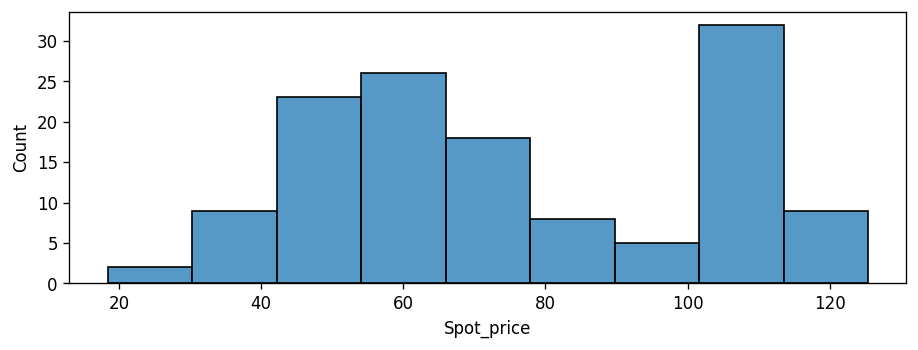

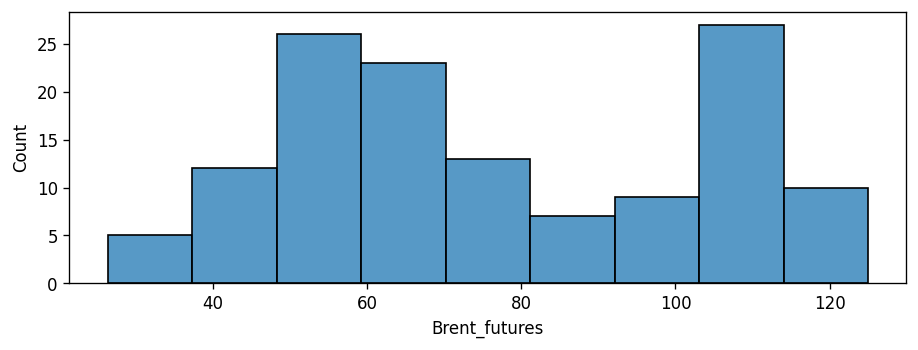

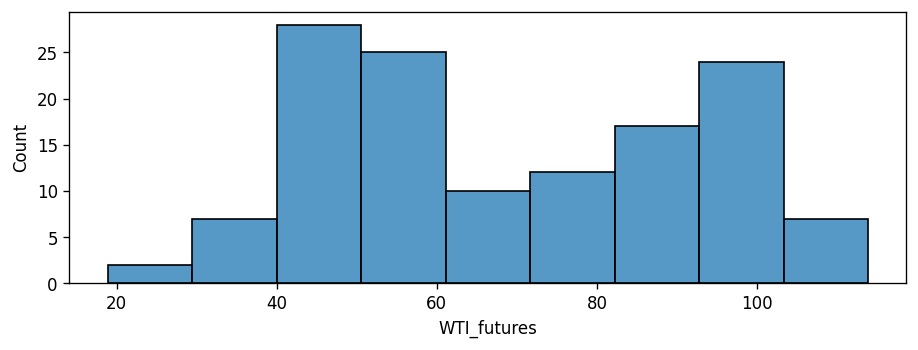

In [37]:
# Visualising data to observe parterns
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Spot_price', data=df,)
plt.show()  
sns.histplot(x='Brent_futures', data=df,)  
plt.show()
sns.histplot(x='WTI_futures', data=df, )
plt.show()

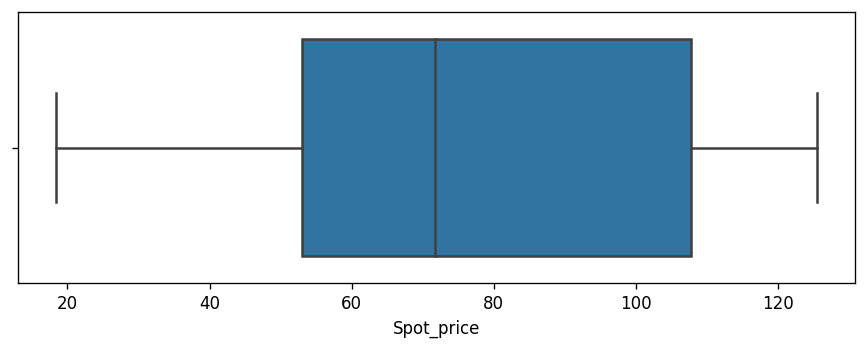

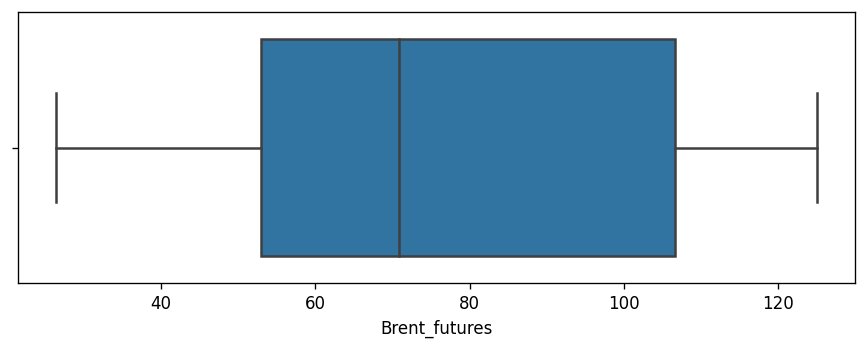

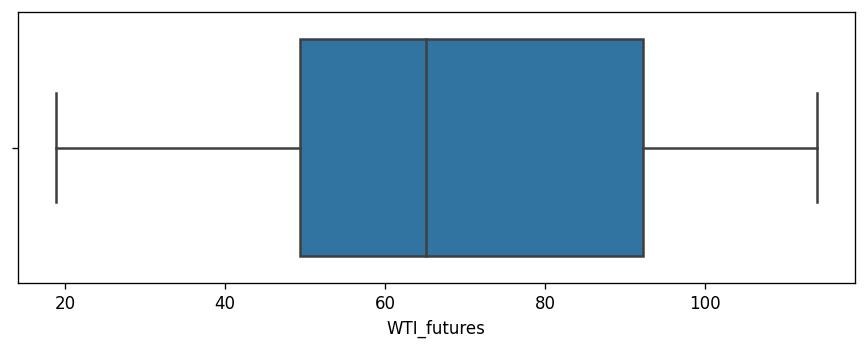

In [38]:
# Visualising data to detect outlier 

sns.boxplot(x='Spot_price', data=df)
plt.show()
sns.boxplot(x='Brent_futures', data=df)
plt.show()
sns.boxplot(x='WTI_futures', data=df)

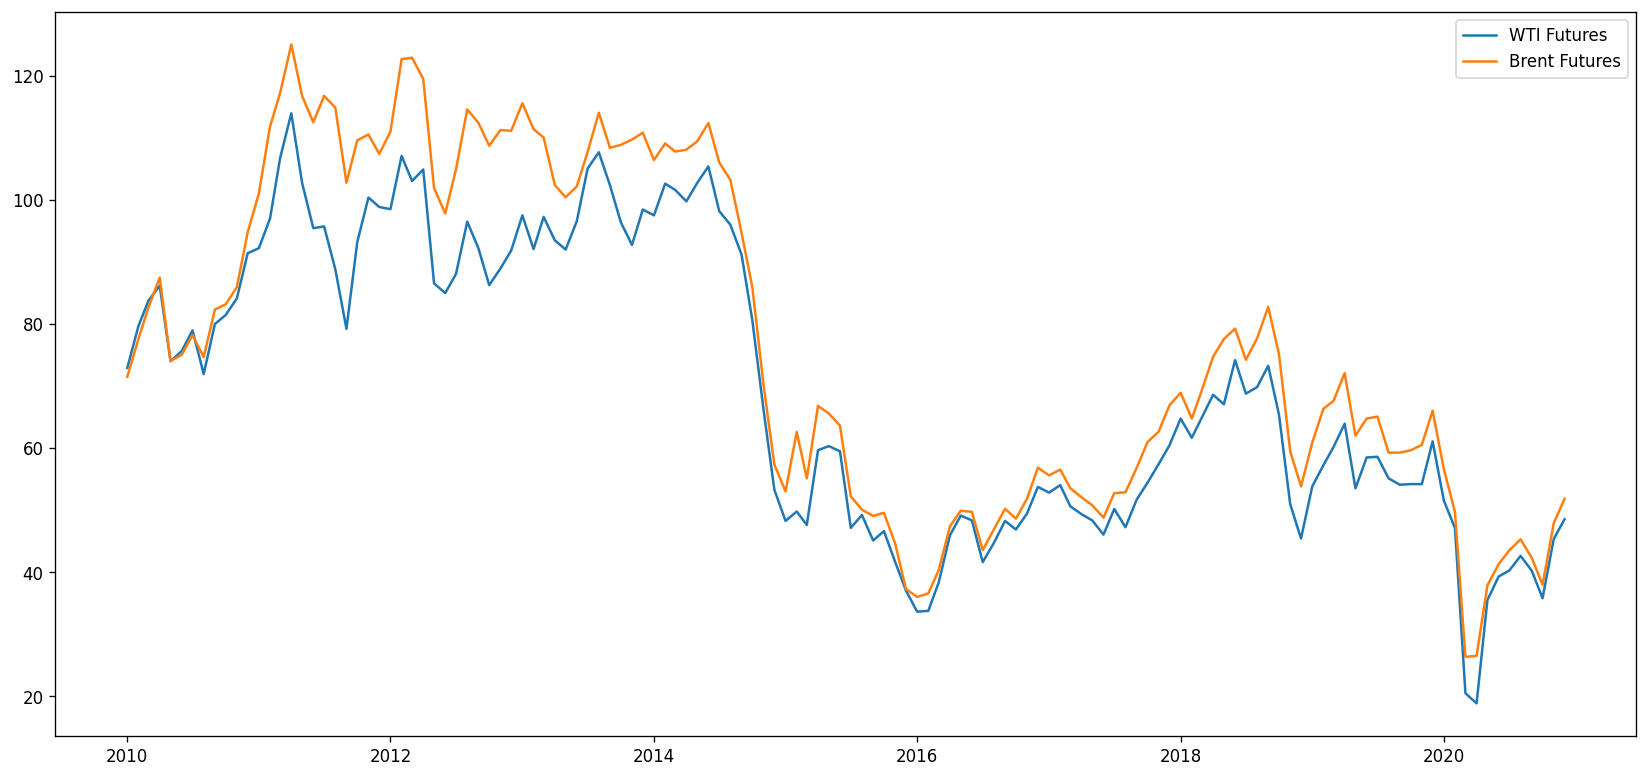

In [39]:
# Visualising the correlation between the two futures prices
plt.figure(figsize=(17,8))
plt.plot(df.Date, df.WTI_futures)
plt.plot(df.Date, df.Brent_futures)

plt.legend(["WTI Futures", "Brent Futures"])

In [40]:
# Calculating the correlation between the two futures prices
from scipy.stats import pearsonr
corr, _ = pearsonr(df.WTI_futures, df.Brent_futures)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.983


In [41]:
 # Performance of the different futures with respect to spot price
corr1, _ = pearsonr(df.Spot_price, df.WTI_futures)
print('Pearsons correlation between spot price   and WTI futures: %.3f' % corr1)
corr2, _ = pearsonr(df.Spot_price, df.Brent_futures)
print('Pearsons correlation between spot price and brent futures: %.3f' % corr2)

Pearsons correlation between spot price   and WTI futures: 0.973
Pearsons correlation between spot price and brent futures: 0.992


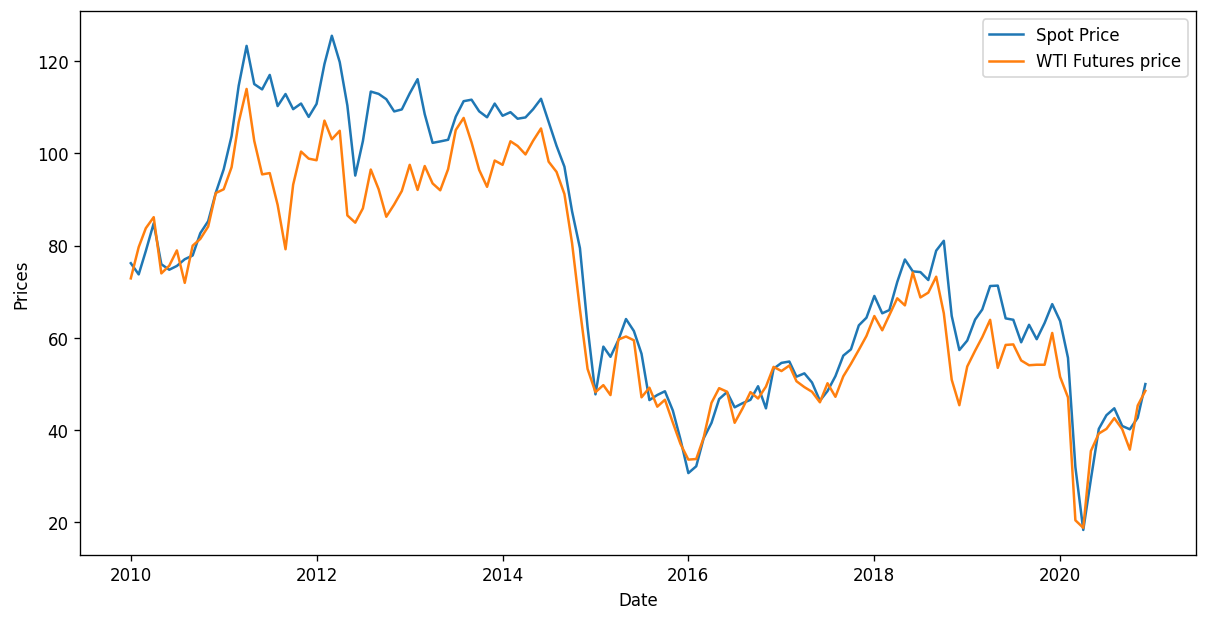

In [42]:
# Visualising the correlation between the Sport and the WTI futures price
plt.figure(figsize=(12,6))
plt.ylabel('Prices')
plt.xlabel('Date')
plt.plot(df.Date, df.Spot_price)
plt.plot(df.Date, df.WTI_futures)

plt.legend(["Spot Price", "WTI Futures price"])

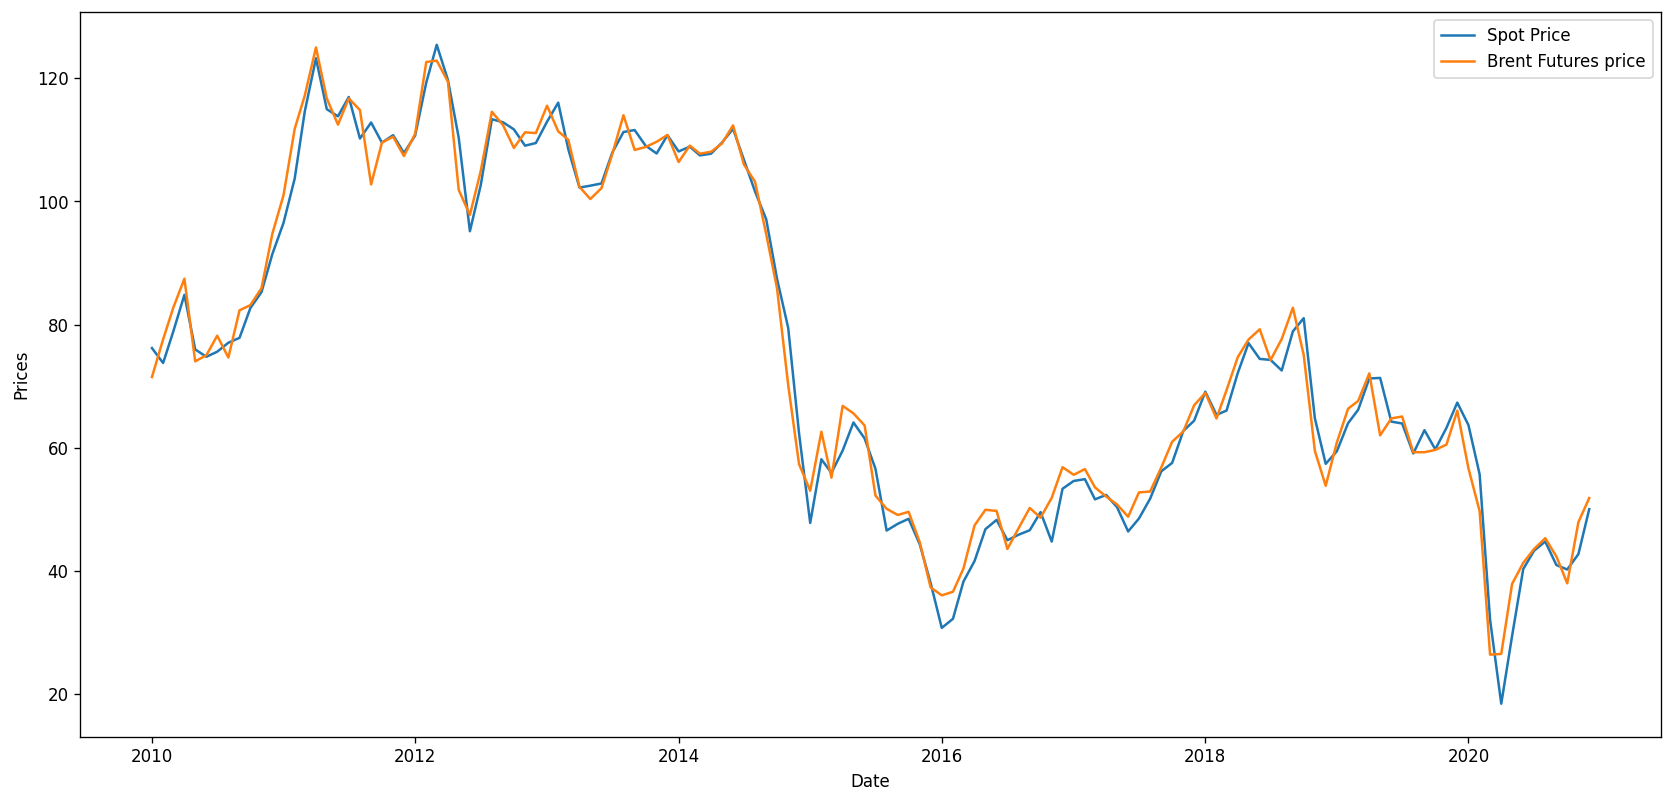

In [43]:
# Visualising the correlation between the Sport and the brent futures price
plt.figure(figsize=(17,8))
plt.ylabel('Prices')
plt.xlabel('Date')
plt.plot(df.Date, df.Spot_price)
plt.plot(df.Date, df.Brent_futures)

plt.legend(["Spot Price", "Brent Futures price"])

In [44]:
 # Calculating the spot-futures basis

df["Basis"] = df.Spot_price - df.Brent_futures

df


,Date,Spot_price,WTI_futures,Brent_futures,Basis
0,2010-01-01,76.17,72.89,71.46,4.71
1,2010-02-01,73.75,79.66,77.59,-3.84
2,2010-03-01,78.83,83.76,82.70,-3.87
3,2010-04-01,84.82,86.15,87.44,-2.62
4,2010-05-01,75.95,73.97,74.02,1.93
...,...,...,...,...,...
127,2020-08-01,44.74,42.61,45.28,-0.54
128,2020-09-01,40.91,40.22,42.30,-1.39
129,2020-10-01,40.19,35.79,37.94,2.25
130,2020-11-01,42.69,45.34,47.88,-5.19


In [45]:
# Viewing what our data looks like
df.describe()

,Spot_price,WTI_futures,Brent_futures,Basis
count,132.000000,132.000000,132.000000,132.000000
mean,76.128712,69.624015,76.726818,-0.598106
std,27.420733,23.246390,26.919648,3.418400
min,18.380000,18.840000,26.350000,-8.460000
25%,53.060000,49.297500,52.957500,-2.582500
50%,71.715000,65.125000,70.805000,-0.640000
75%,107.767500,92.190000,106.645000,0.735000
max,125.450000,113.930000,125.020000,10.070000


In [46]:


# importing some statistical lybrarys
import numpy as np
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

In [47]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

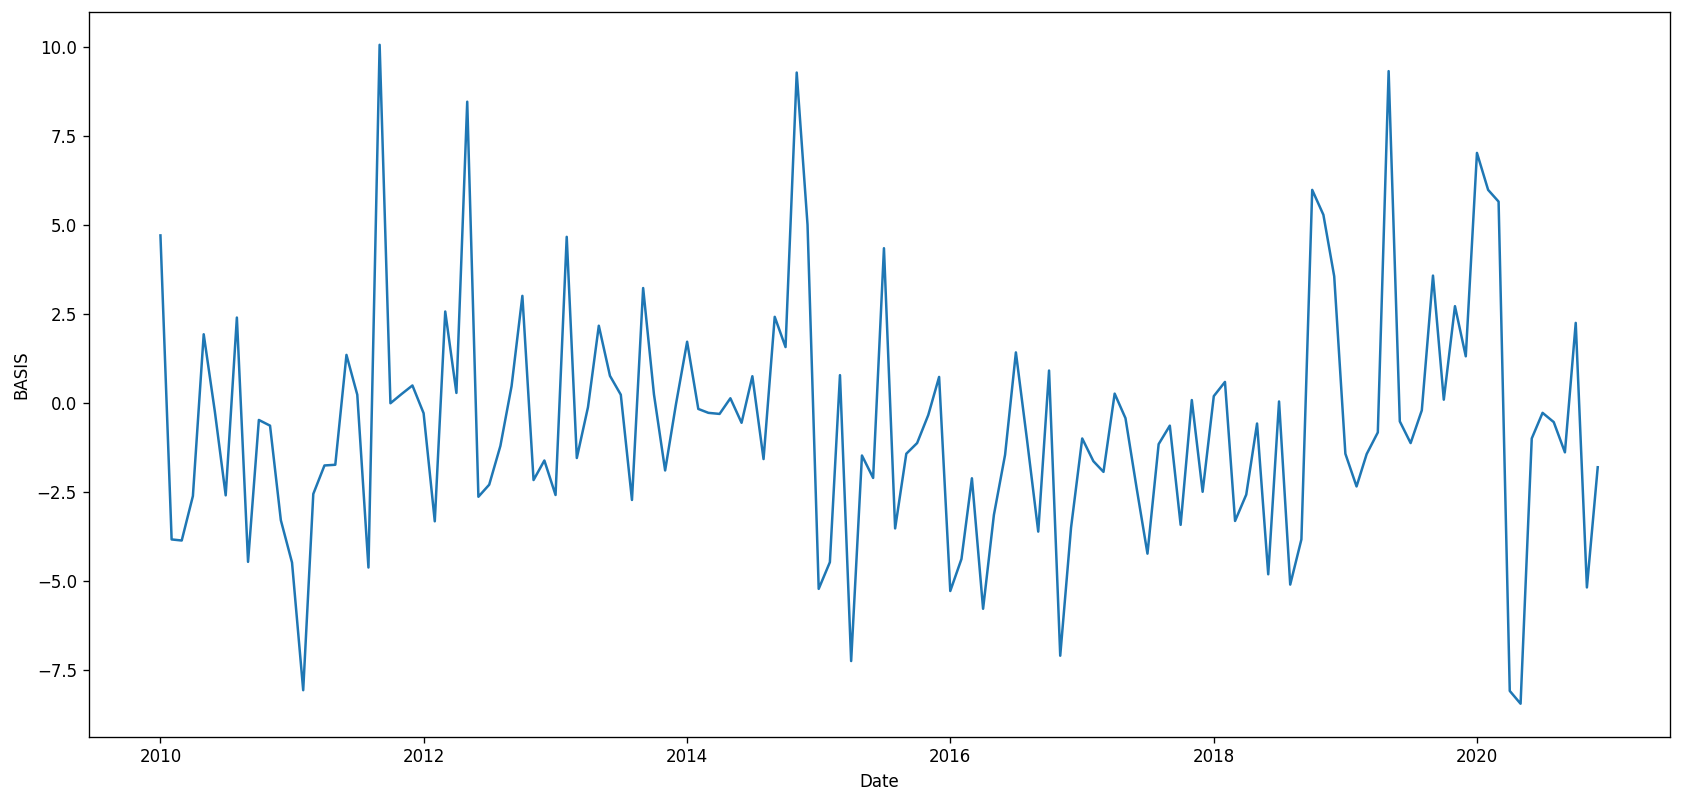

In [48]:
# Plotting our basis data
plt.figure(figsize=(17, 8))
plt.plot(df.Date, df.Basis)
plt.ylabel('BASIS')
plt.xlabel('Date')
plt.grid(False)
plt.show()

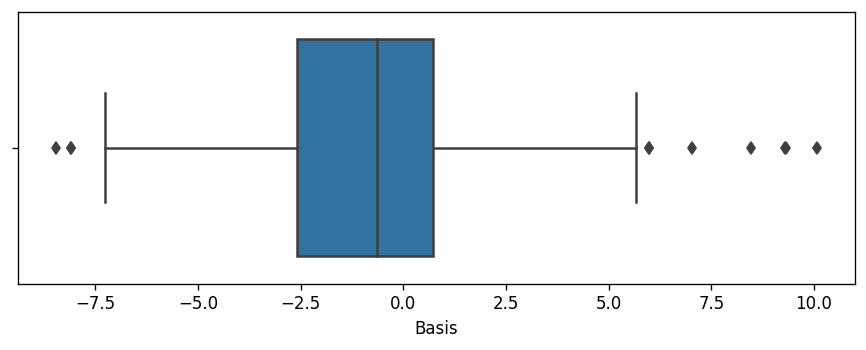

In [49]:
sns.boxplot(x='Basis', data = df)

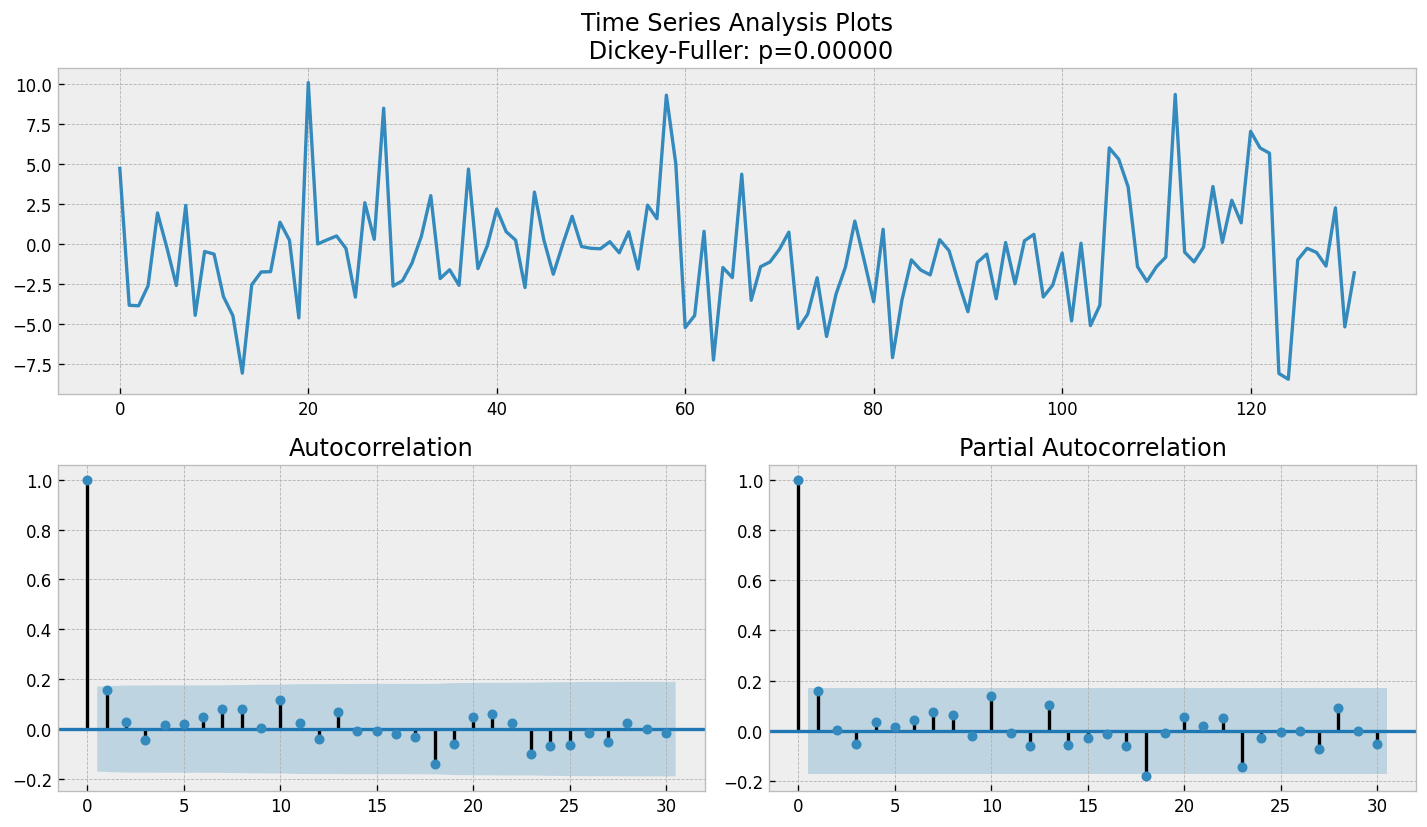

In [50]:
# Performing the stationarity test

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df.Basis, lags=30)

In [51]:
# Runing our arima model

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.Basis, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Basis   No. Observations:                  132
Model:                     ARMA(2, 2)   Log Likelihood                -345.633
Method:                       css-mle   S.D. of innovations              3.303
Date:                Tue, 19 Jul 2022   AIC                            703.266
Time:                        21:48:24   BIC                            720.563
Sample:                             0   HQIC                           710.294
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5994      0.309     -1.938      0.055      -1.205       0.007
ar.L1.Basis    -0.8539      0.086     -9.971      0.000      -1.022      -0.686
ar.L2.Basis    -0.8647      0.090     -9.562    

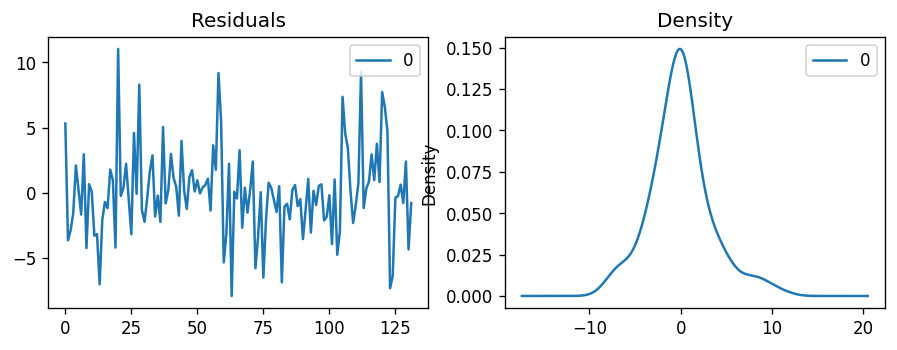

In [52]:
#Plot residual errors
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

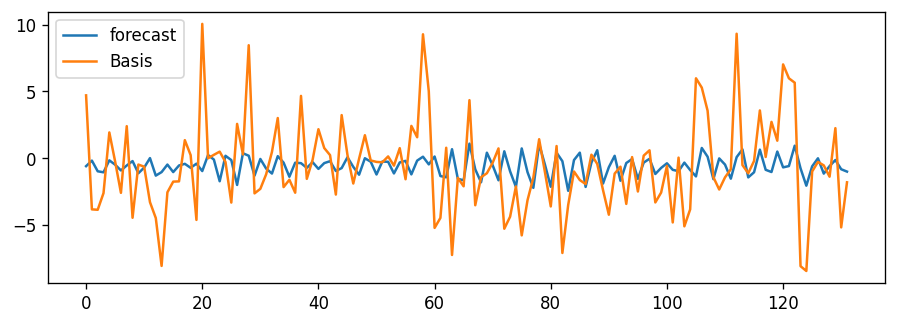

In [53]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [54]:
from statsmodels.tsa.stattools import acf

# Create Training and Test

train = df.Basis[:85]
test = df.Basis[85:]

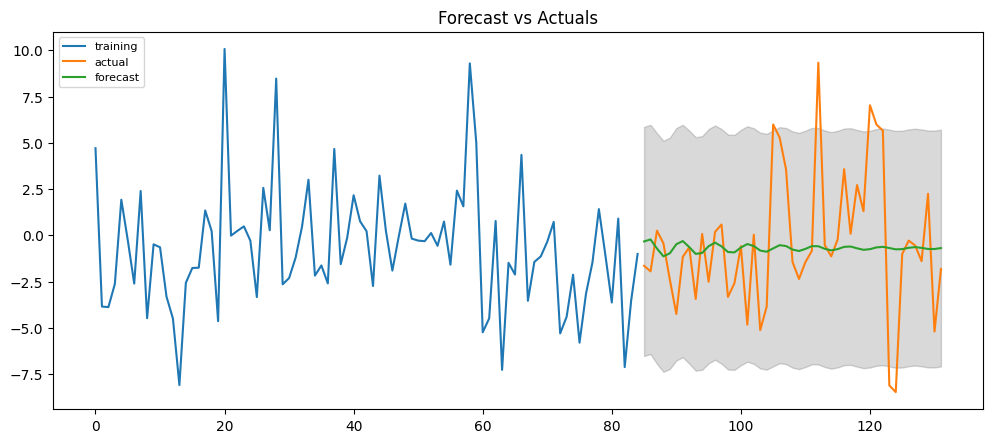

In [55]:
# Build Model
model = ARIMA(train, order=(2,0,2))  
model = ARIMA(train, order=(2, 0,2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(47, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [56]:
fc_series

85    -0.324029
86    -0.216360
87    -0.707646
88    -1.127627
89    -0.961715
90    -0.474663
91    -0.303662
92    -0.629503
93    -0.997674
94    -0.946573
95    -0.581650
96    -0.387647
97    -0.588458
98    -0.895103
99    -0.916055
100   -0.653884
101   -0.462614
102   -0.572756
103   -0.817313
104   -0.879027
105   -0.699536
106   -0.525958
107   -0.573331
108   -0.760688
109   -0.841271
110   -0.725663
111   -0.577117
112   -0.583464
113   -0.721314
114   -0.806258
115   -0.738070
116   -0.616785
117   -0.598385
118   -0.695430
119   -0.775808
120   -0.741337
121   -0.646336
122   -0.614879
123   -0.679684
124   -0.750610
125   -0.738936
126   -0.667432
127   -0.630914
128   -0.671244
129   -0.730630
130   -0.733391
131   -0.681766
dtype: float64

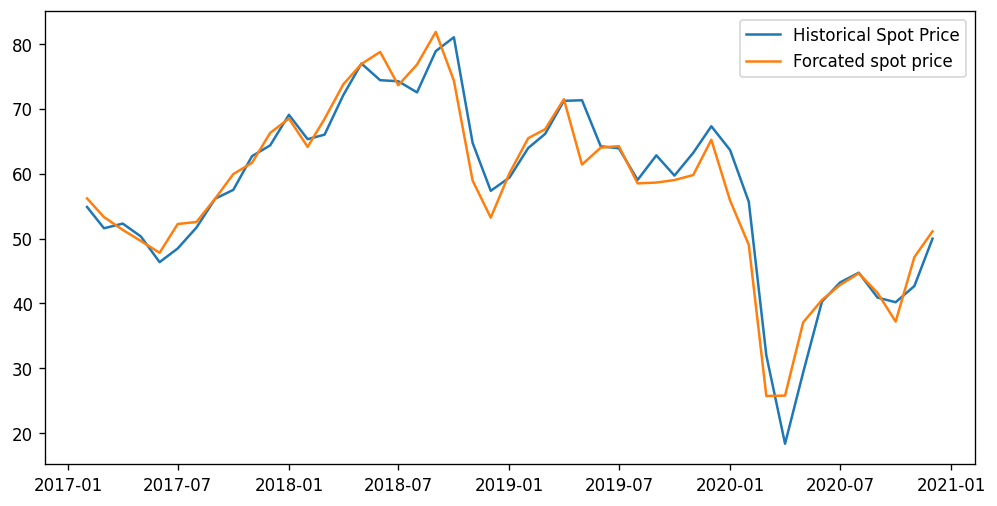

In [57]:
# Forcasting spot price

t_futures = df.Brent_futures[85:]
f_spot_price = t_futures + fc_series
f_date = df.Date[85:]
r_spot = df.Spot_price[85:]

plt.figure(figsize=(10,5))
plt.plot(f_date, r_spot)
plt.plot(f_date, f_spot_price)

plt.legend(["Historical Spot Price", "Forcated spot price"])

In [58]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 18.3 MB/s 
     |████████████████████████████████| 9.8 MB 47.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [59]:
# runing our  auto arima function

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm



model = pm.auto_arima(df.Basis, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=703.515, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=704.108, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=701.556, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=701.915, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=703.501, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=705.194, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=700.774, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=702.098, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=702.774, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=702.774, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=700.913, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=704.498, Time=0.28 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.773 seconds
                           Statespace Model Results                           
Dep. Variable:       

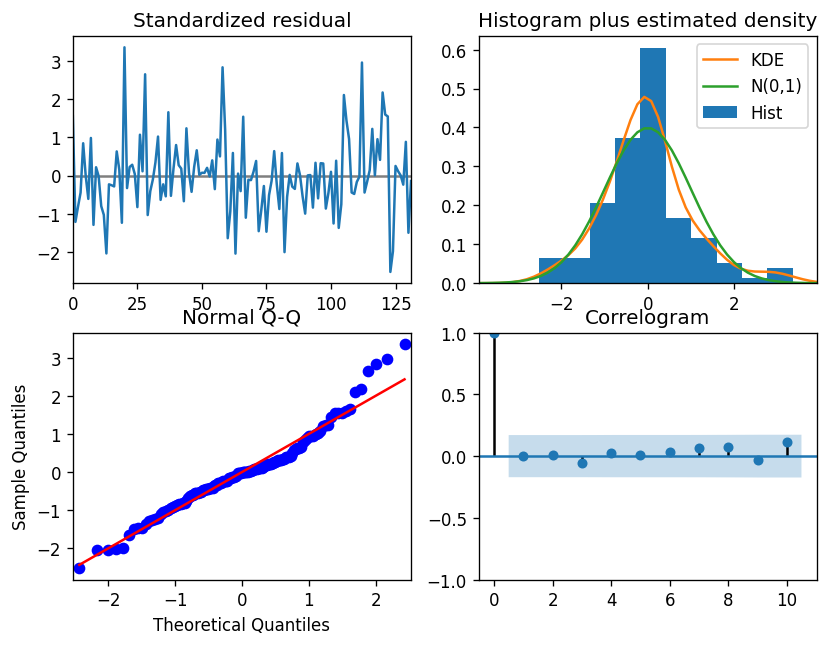

In [60]:
model.plot_diagnostics(figsize=(8,6))
plt.show()

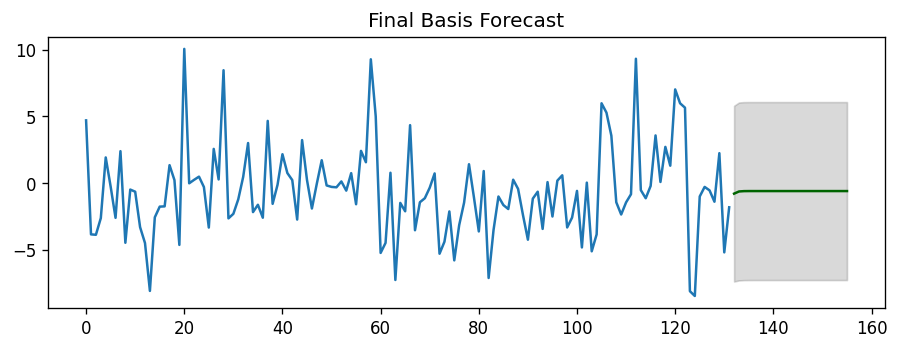

In [61]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Basis), len(df.Basis)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Basis)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Basis Forecast")
plt.show()


In [62]:
fc_series

132   -0.785448
133   -0.622925
134   -0.597144
135   -0.593054
136   -0.592406
137   -0.592303
138   -0.592286
139   -0.592284
140   -0.592283
141   -0.592283
142   -0.592283
143   -0.592283
144   -0.592283
145   -0.592283
146   -0.592283
147   -0.592283
148   -0.592283
149   -0.592283
150   -0.592283
151   -0.592283
152   -0.592283
153   -0.592283
154   -0.592283
155   -0.592283
dtype: float64

In [63]:
# function to generate buy and sell signals

def buy_sell(df):
    signalBuy = []
    signalSell = []
   # position = False 
    i = 0
    for i in range(len(df)):
        if df['Basis'][i] < -2.5 :
           # if position == False :
                signalBuy.append(df['Basis'][i])
                signalSell.append(np.nan)
                #position = True
           
        elif df['Basis'][i] > 2:
          #if position == True:
                signalBuy.append(np.nan)
                signalSell.append(df['Basis'][i])
               # position = False
          
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
            
    return pd.Series([signalBuy, signalSell])

In [64]:
df['Buy_Signal_price'], df['Sell_Signal_price'] = buy_sell(df)
df

,Date,Spot_price,WTI_futures,Brent_futures,Basis,Buy_Signal_price,Sell_Signal_price
0,2010-01-01,76.17,72.89,71.46,4.71,NaN,4.71
1,2010-02-01,73.75,79.66,77.59,-3.84,-3.84,NaN
2,2010-03-01,78.83,83.76,82.70,-3.87,-3.87,NaN
3,2010-04-01,84.82,86.15,87.44,-2.62,-2.62,NaN
4,2010-05-01,75.95,73.97,74.02,1.93,NaN,NaN
...,...,...,...,...,...,...,...
127,2020-08-01,44.74,42.61,45.28,-0.54,NaN,NaN
128,2020-09-01,40.91,40.22,42.30,-1.39,NaN,NaN
129,2020-10-01,40.19,35.79,37.94,2.25,NaN,2.25
130,2020-11-01,42.69,45.34,47.88,-5.19,-5.19,NaN


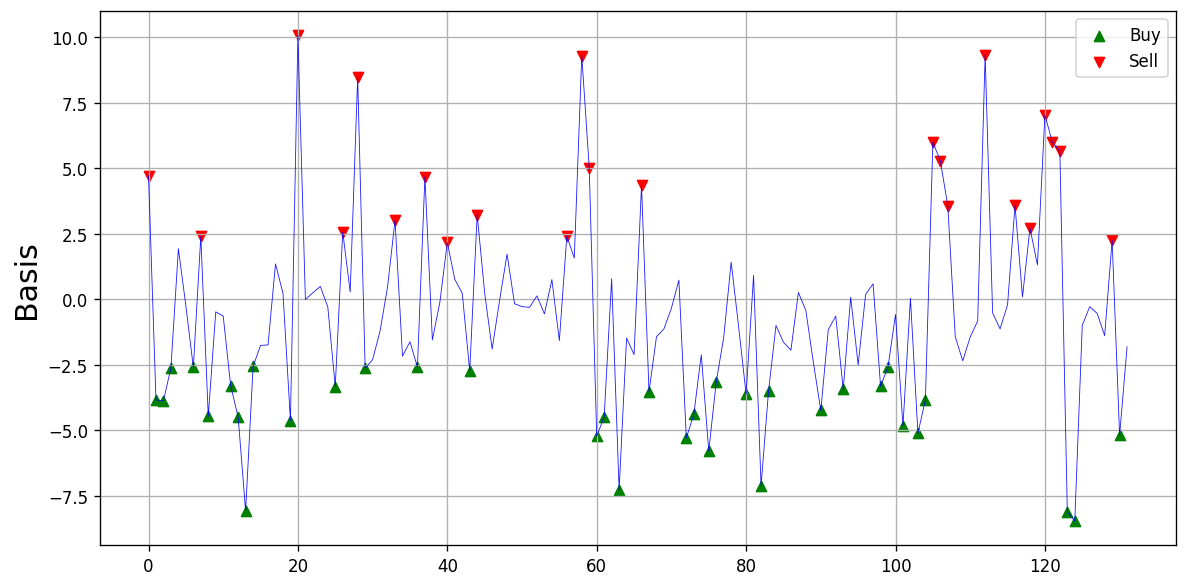

In [65]:
# ploting the by and sell signals

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df['Basis'] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.scatter(df.index , df['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(df.index , df['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_ylabel('Basis' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()
